### Data analysis of Section 11 data.

1. Check all surface maps without thermal compensation
1. Check all surface maps with thermal compensation (due to poor thermal condition, we had to use these for optimization)
1. Make T maps for each surface
2. Plot the RB corrections as a function of iteration.
2. Plot bending force RMS as a function of iteration.
2. Spot check the forces applied at each iteration were applied as intended (Gravity+optimized+bending)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob, shutil

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

In [2]:
dateID = '250221'
niter = 17
ntsamples = 100
nBMs = 27
band_width = 4 #in minutes; how long it took for each measurement

In [5]:
_, filesetM = parse_ml_data_folder('%s/Sec 11/27 modes/%s/'%(ml_data_dir, dateID))

x 250221_7/250221 GMT3 set7avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250221_7/250221 GMT3 set7avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250221_14/250221 GMT3 set14avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250221_14/250221 GMT3 set14avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250221_9/250221 GMT3 set9avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250221_9/250221 GMT3 set9avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250221_13/250221 GMT3 set13avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250221_13/250221 GMT3 set13avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5
x 250221_12/250221 GMT3 set12avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5
x 250221_12/250221 GMT3 set12avg 11.2 10 27 modes gmtMorp

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_1/250221 GMT3 set1avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_2/250221 GMT3 set2avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_3/250221 GMT3 set3avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_4/250221 GMT3 set4avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_5/250221 GMT3 set5avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date no

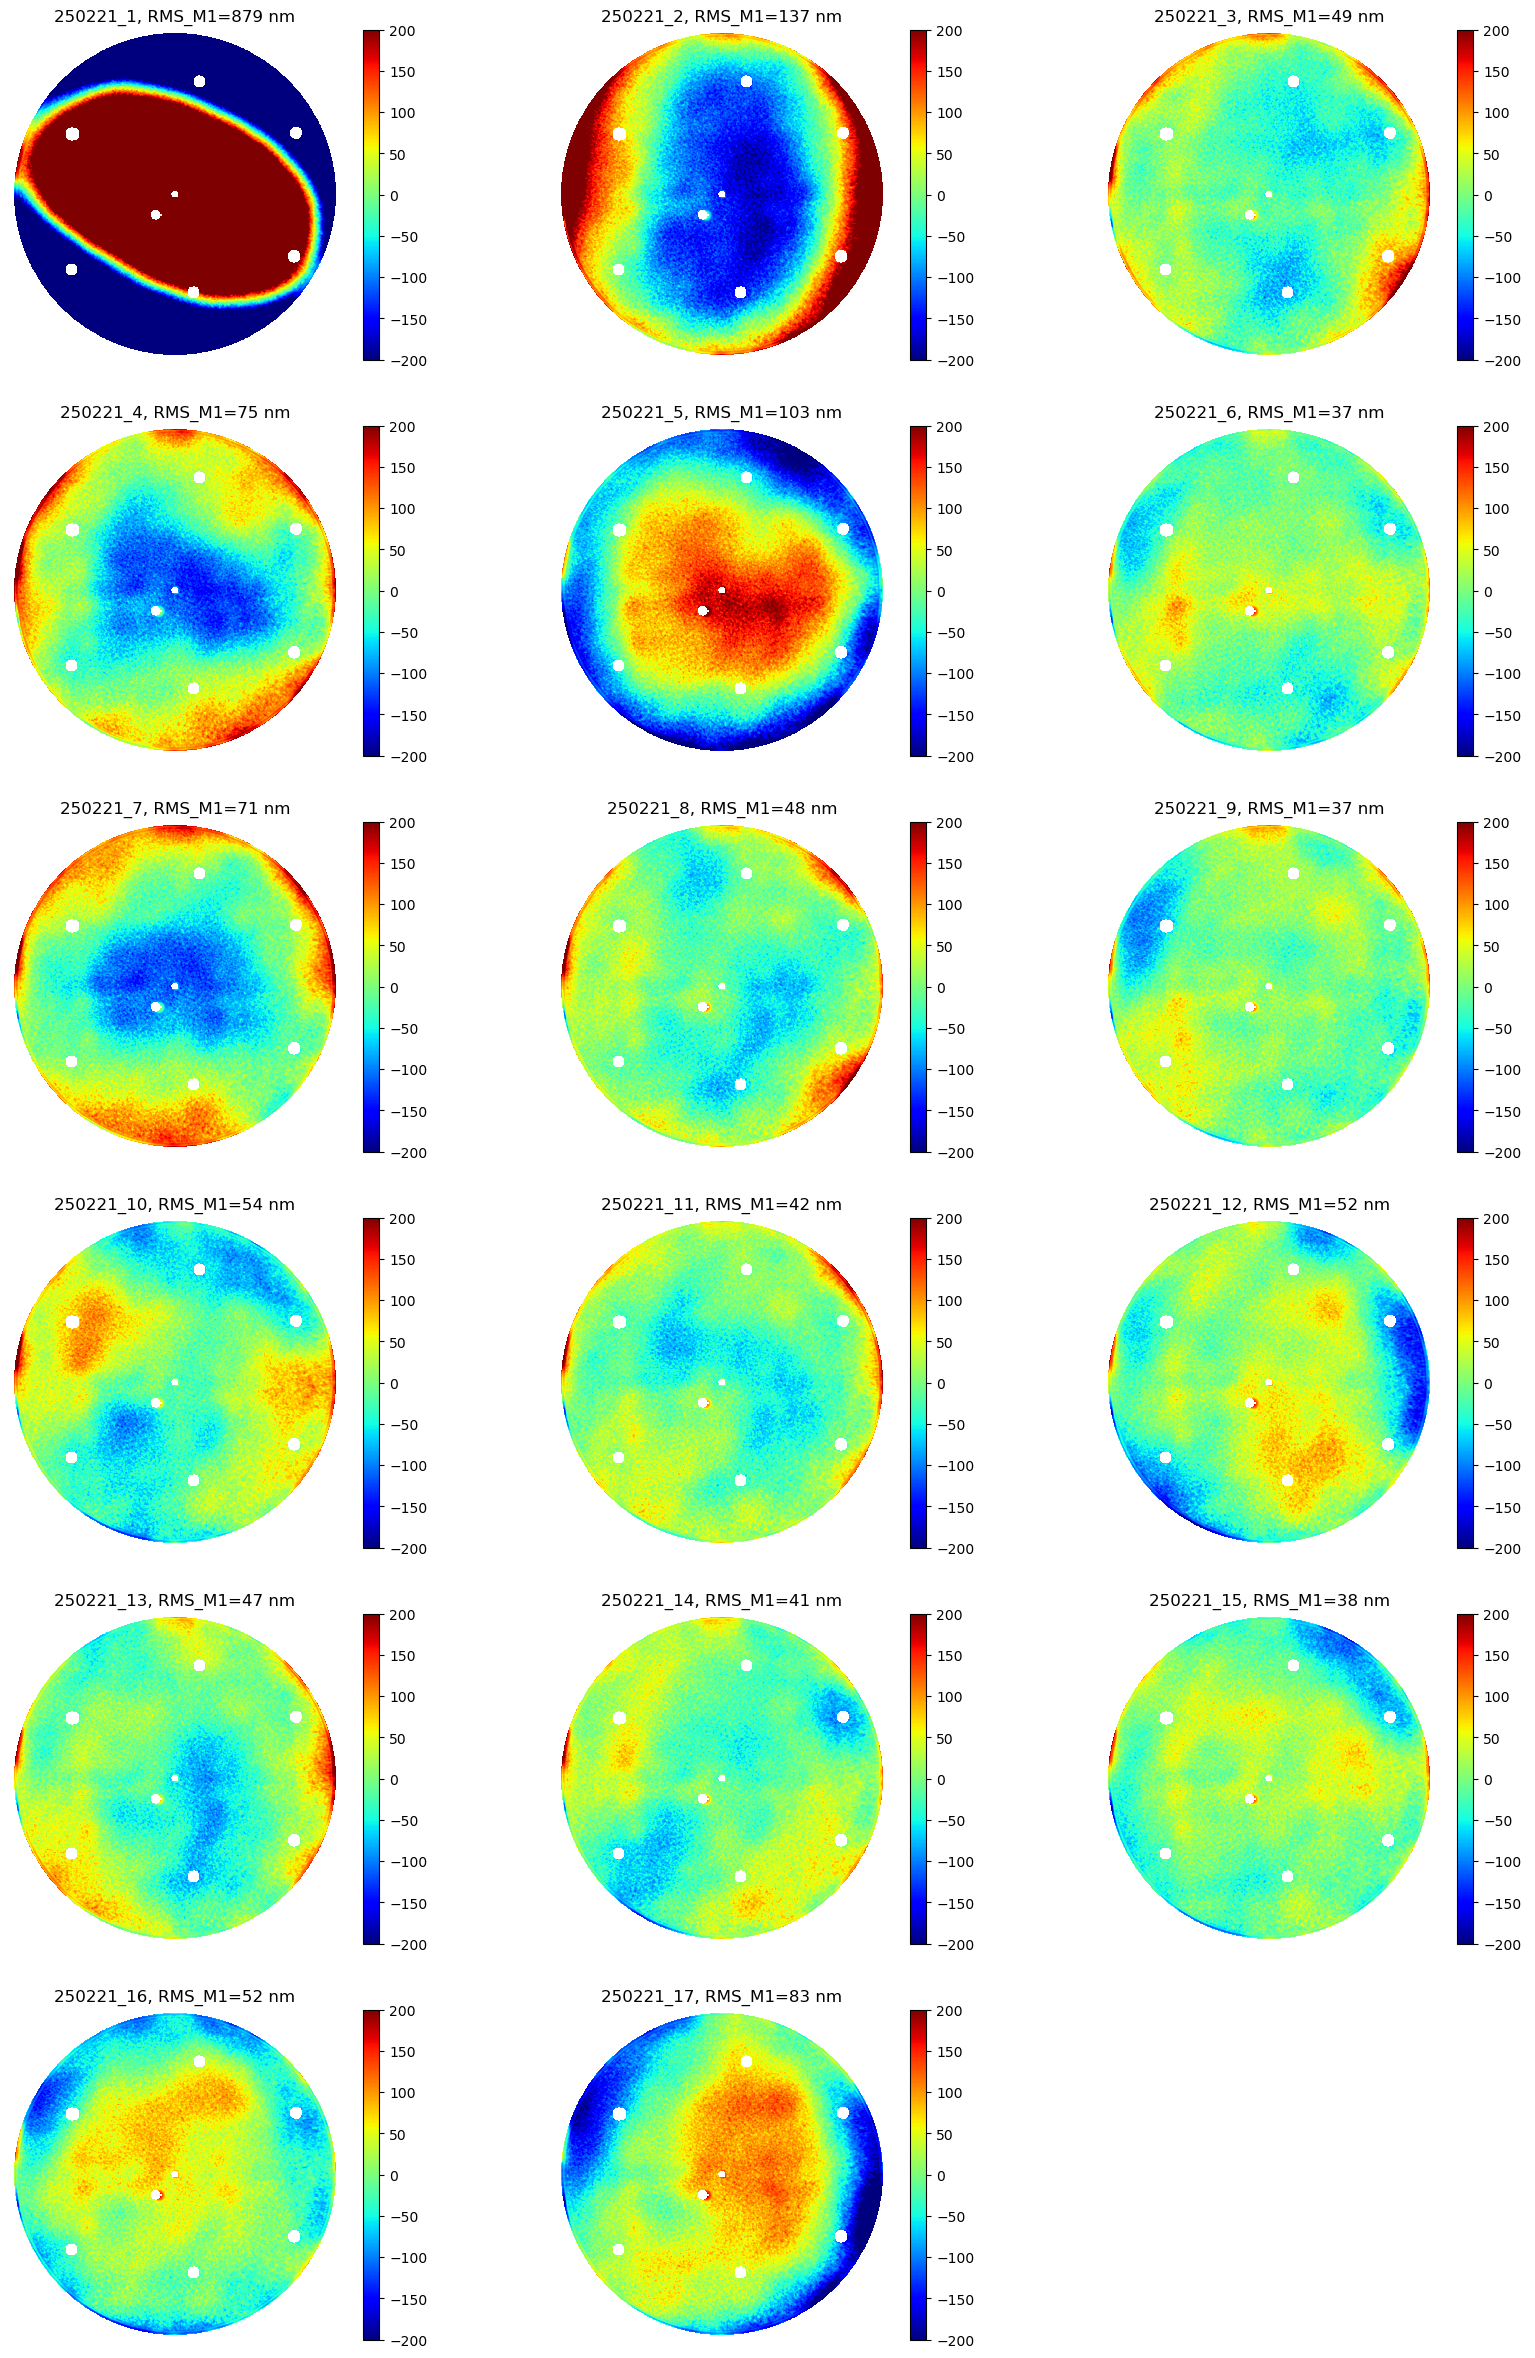

In [44]:
#plot processed maps from each iteration
m1s_array = np.zeros((Sxn, Syn, niter))
m1rms_array = np.zeros(niter)
nrow = int(np.ceil(niter/3))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 11/27 modes/%s/%s_%s/%s*set*patched.h5'%(
        ml_data_dir,dateID, dateID, i+1, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    m1s_array[:,:, i] = m1s
    
    m1rms_array[i] = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms_array[i]))
    ax[irow][icol].axis('off')
    if m1rms_array[i]<=40:
        shutil.copy2(fileset[0], '../opti_h5/')
for i in range(3*nrow):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')    

In [7]:
#we have to retrieve timestamps from earlier stage data files
#below is only for retrieving timestamps
ts_array = []
for i in range(niter):
    globstring = '%s/Sec 11/27 modes/%s/%s_%s/%s*set*comp -.h5'%(ml_data_dir, dateID, dateID, i+1, dateID)
    fileset = sorted(glob.glob(globstring))
    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    temp,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    ts_array.append(ts)

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_1/250221 GMT3 set1avg 11.2 10 27 modes gmtMorph170614 LFSsub comp -.h5: Fri Feb 21 11:58:33 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_2/250221 GMT3 set2avg 11.2 10 27 modes gmtMorph170614 LFSsub comp -.h5: Fri Feb 21 12:31:37 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_3/250221 GMT3 set3avg 11.2 10 27 modes gmtMorph170614 LFSsub comp -.h5: Fri Feb 21 12:42:03 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_4/250221 GMT3 set4avg 11.2 10 27 modes gmtMorph170614 LFSsub comp -.h5: Fri Feb 21 12:52:55 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_5/250221 GMT3 set5avg 11.2 10 27 modes gmtMorph170614 LFSsub comp -.h5: Fri Feb 21 13:04:41 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Op

### Below shows an effort to remove the 4D noise and see what we get

### SKIP this part. Because some of the high spatial frequency features are real. Removing everything beyond 500 Zernikes is too optimistic

Note that we also tried to remove the 4D noise using smoothing kernels, e.g., Gaussians. That erodes the mirror edges, and makes the fiducial holes much larger..

In [6]:
nzer = 500 #int((8*9)/2+1) 
zercoeff = np.zeros((niter, nzer))
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()

In [7]:
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 11/27 modes/%s/%s_%s/%s*set*patched.h5'%(
        ml_data_dir,dateID, dateID, i+1, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    #leave m1s in micron #in optical CS, but this doesn't matter
    
    maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
    nnodesNew = np.sum(maskNew)
    zercoeff[i,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]
    smoothed_image = np.zeros_like(m1s)
    for izer in range(nzer):
        smoothed_image[maskNew] += zercoeff[i,izer]*zerU[maskNew.flatten(),izer]
    map_file = fileset[0].replace('.h5', ' -4Dnoise.h5')
    #print(map_file)
    writeH5map(map_file, smoothed_image, centerRow,centerCol,pixelSize, ts_array[i])

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_1/250221 GMT3 set1avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_2/250221 GMT3 set2avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_3/250221 GMT3 set3avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_4/250221 GMT3 set4avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_5/250221 GMT3 set5avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date no

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_1/250221 GMT3 set1avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched -4Dnoise.h5: Fri Feb 21 11:58:33 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_2/250221 GMT3 set2avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched -4Dnoise.h5: Fri Feb 21 12:31:37 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_3/250221 GMT3 set3avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched -4Dnoise.h5: Fri Feb 21 12:42:03 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_4/250221 GMT3 set4avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched -4Dnoise.h5: Fri Feb 21 12:52:55 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_5/250221 GMT3 set5avg 11.2 10 27 modes gmtMo

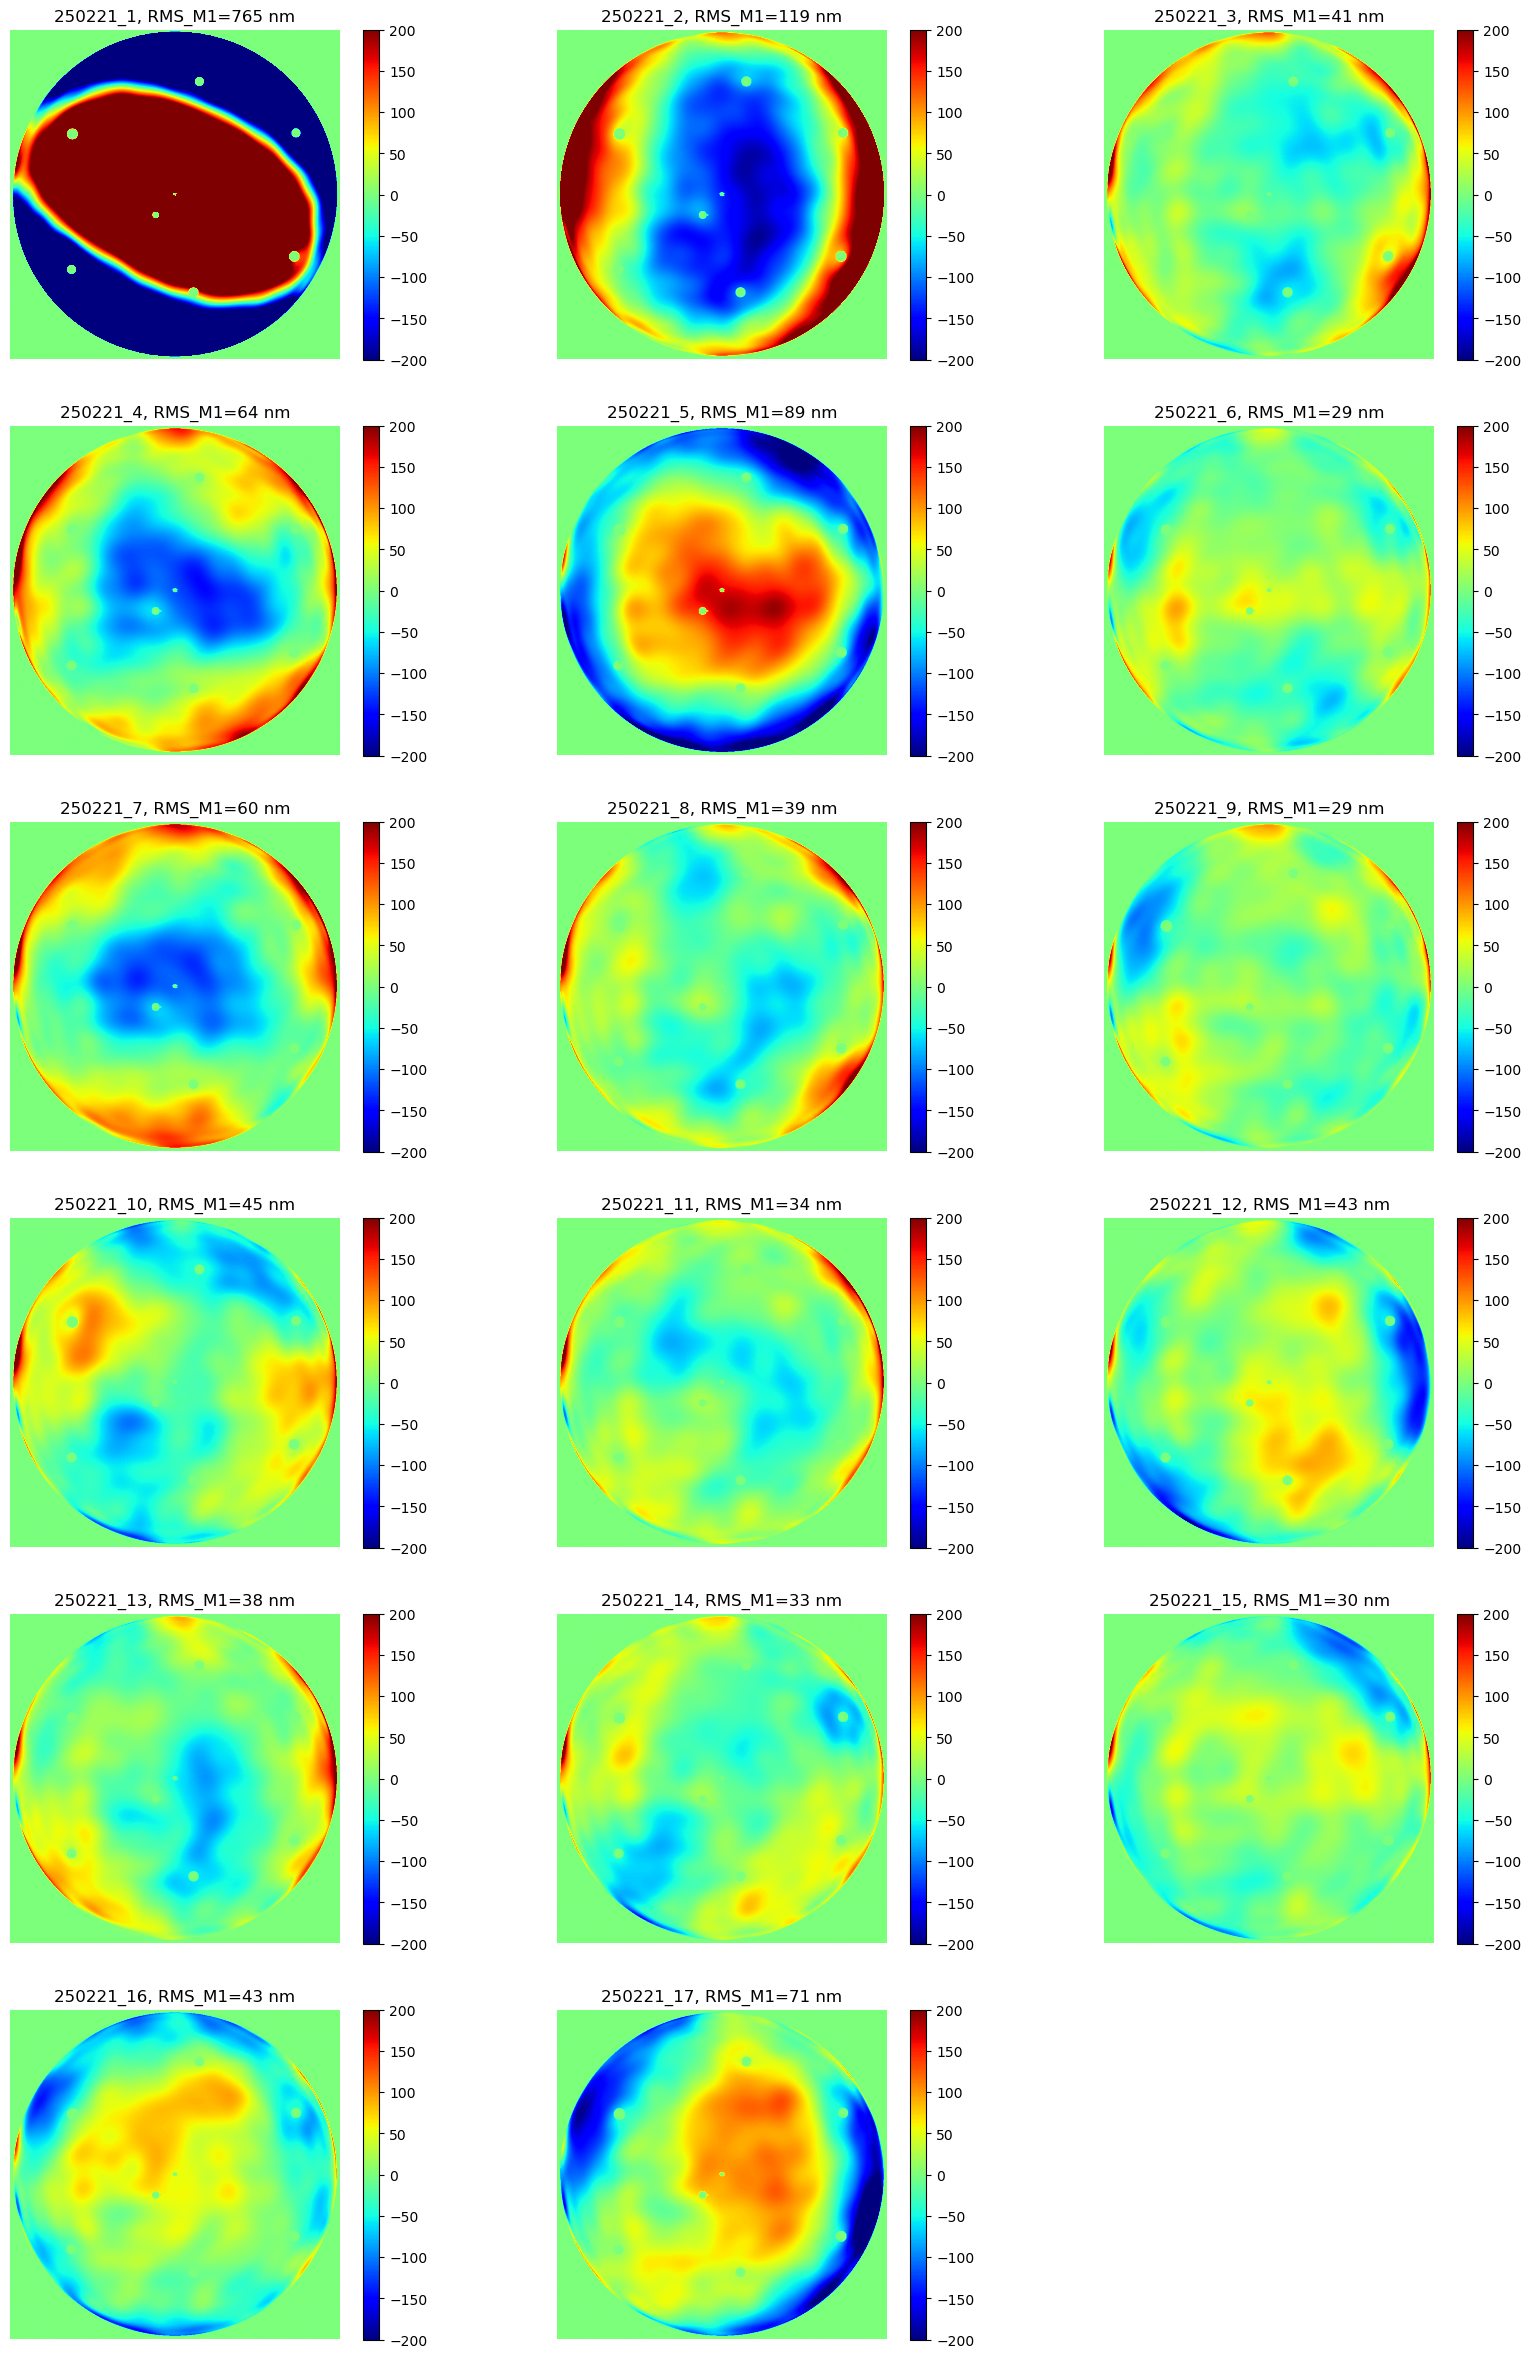

In [13]:
#plot reprocessed maps from each iteration - now without 4D noise
m1s_array = np.zeros((Sxn, Syn, niter))
m1rms_array = np.zeros(niter)
nrow = int(np.ceil(niter/3))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 11/27 modes/%s/%s_%s/%s*set*-4Dnoise.h5'%(
        ml_data_dir,dateID, dateID, i+1, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    m1s_array[:,:, i] = m1s
    
    m1rms_array[i] = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms_array[i]))
    ax[irow][icol].axis('off')
for i in range(3*nrow):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')   

### Resume normal processing here

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_1/250221 GMT3 set1avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_2/250221 GMT3 set2avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_3/250221 GMT3 set3avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_4/250221 GMT3 set4avg 11.2 10 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250221/250221_5/250221 GMT3 set5avg 11.2 10 27 mod

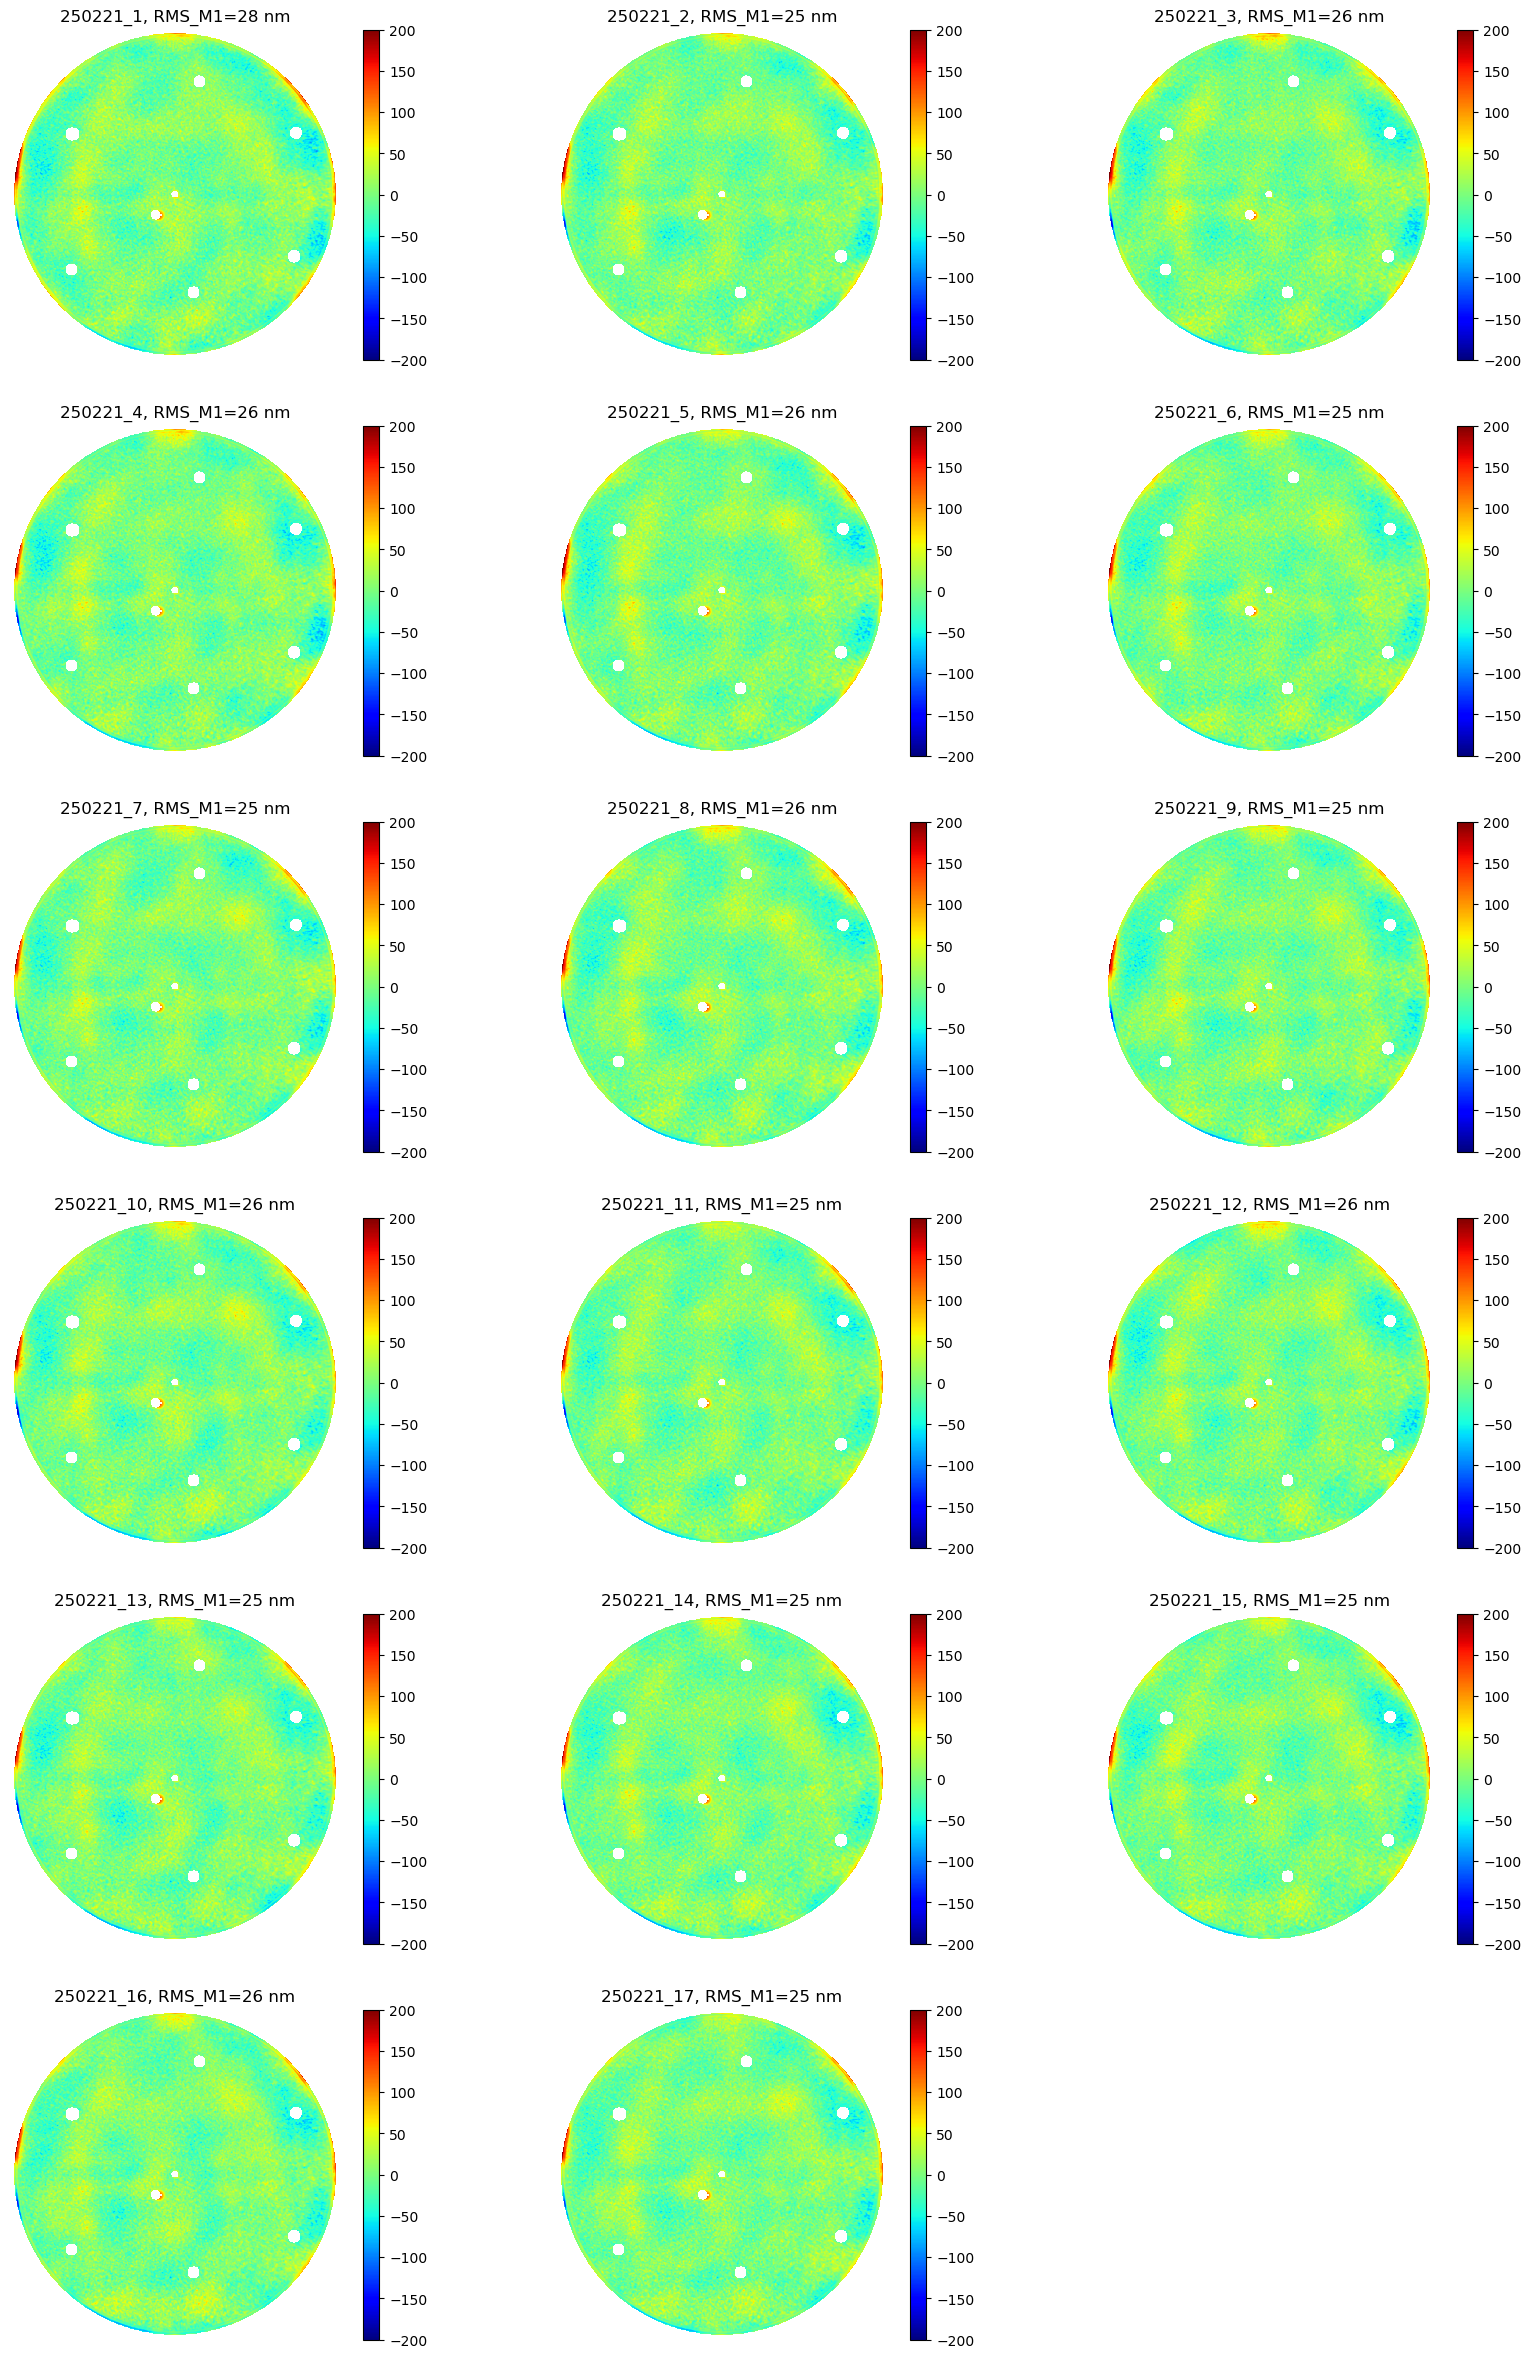

In [8]:
#predicted maps at each iteration
m1s_array_predict = np.zeros((Sxn, Syn, niter))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 11/27 modes/%s/%s_%s/%s*set*patched - 27 GMT modes.h5'%(
        ml_data_dir, dateID, dateID, i+1, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    m1s_array_predict[:,:, i] = m1s
    
    m1rms = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
    ax[irow][icol].axis('off')
for i in range(3*nrow):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')    

../GMT3 221011 221014 avg TPavgStitched -27modes.h5: date not in h5 file. 
0.01 0.01 427.0 422.0 427.0 422.0
on bar 135
on bar 235
on bar 335
on bar 435
on puck  1135
on puck  1235
on puck  1335
on puck  1435


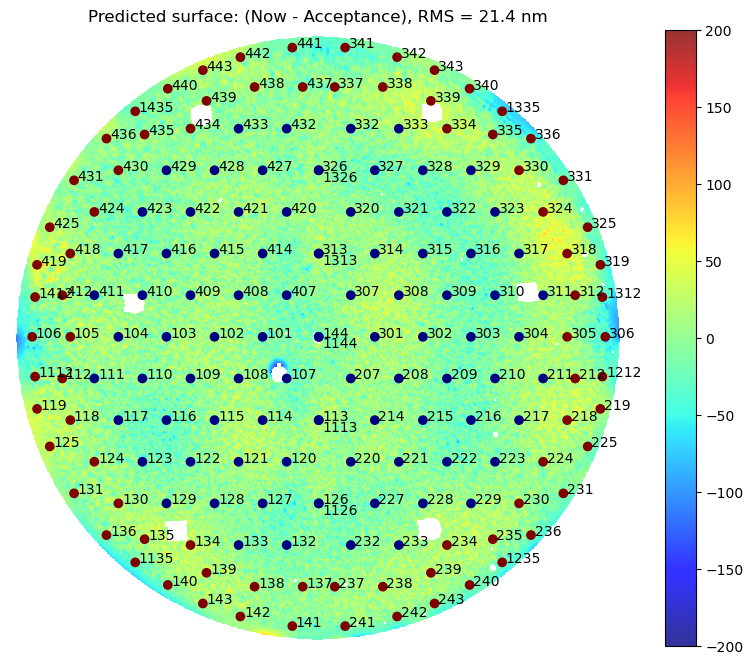

In [53]:
if 0:
    m1s = np.mean(m1s_array_predict, axis=2)
    m1s = -m1s.T
    aa = 'Average of all predicted maps'
elif 0:
    filename = '../GMT3 221011 221014 avg TPavgStitched -27modes.h5'
    m1s,centerRow0,centerCol0,pixelSize0,ts0 = readH5Map([filename])
    m1s = -m1s.T * 1000
    aa = 'Predicted surface at S3 acceptance'
else:
    filename = '../GMT3 221011 221014 avg TPavgStitched -27modes.h5'
    m1s,centerRow0,centerCol0,pixelSize0,ts0 = readH5Map([filename])
    print(pixelSize[0], pixelSize0[0], centerRow[0], centerRow0[0], centerCol[0], centerCol0[0])
    m1s = np.mean(m1s_array_predict, axis=2) - np.pad(m1s*1000, pad_width=5, mode='constant', constant_values=0)
    m1s = -m1s.T 
    aa = 'Predicted surface: (Now - Acceptance)'
    
import matplotlib.image as mpimg
LS = mpimg.imread("../../drawings/LS.png") 

fig, ax = plt.subplots(1,1,figsize=(10,8))
#plt.imshow(np.flipud(LS[80:-85,50:-110, :]), extent=[0,Sxn, Syn,0])
plt.imshow(m1s, origin='lower', vmin=-200, vmax=200, alpha=0.8)
plt.title('%s, RMS = %.1f nm'%(aa, np.sqrt(np.nanmean(m1s**2))))
plt.axis('off')
plt.colorbar()
saxpix = np.zeros_like(sax)
saypix = np.zeros_like(say)
sa8 = []
for i in range(len(sax)):
    saxpix[i] = saID2pixx(saID[i], centerRow, centerCol, pixelSize)
    saypix[i] = saID2pixy(saID[i], centerRow, centerCol, pixelSize)
    if (np.any(abs(sax[i]+say[i]-sax[:i]-say[:i])<1e-4)):
        plt.text(saxpix[i]+.05/pixelSize, saypix[i]-0.15/pixelSize, str(saID[i]))
    else:
        plt.text(saxpix[i]+.05/pixelSize, saypix[i], str(saID[i]))
    if np.mod(saID[i],100) == 35:
        sa8.append(saID[i])
        if dfSA['LSActType'][i]==30:
            print('on puck ', saID[i])
        if dfSA['LSActType'][i]==31:
            print('on bar', saID[i])
plt.scatter(saxpix, saypix, c=saz)

(0.01, 0.01, 427.0, 422.0, 427.0, 422.0)

In [17]:
nzer = 500 #int((30*31)/2+1) 
print('nzer = ', nzer)

[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()

nzer =  500


17.236322 17.23632
on bar 135
on bar 235
on bar 335
on bar 435
on puck  1135
on puck  1235
on puck  1335
on puck  1435


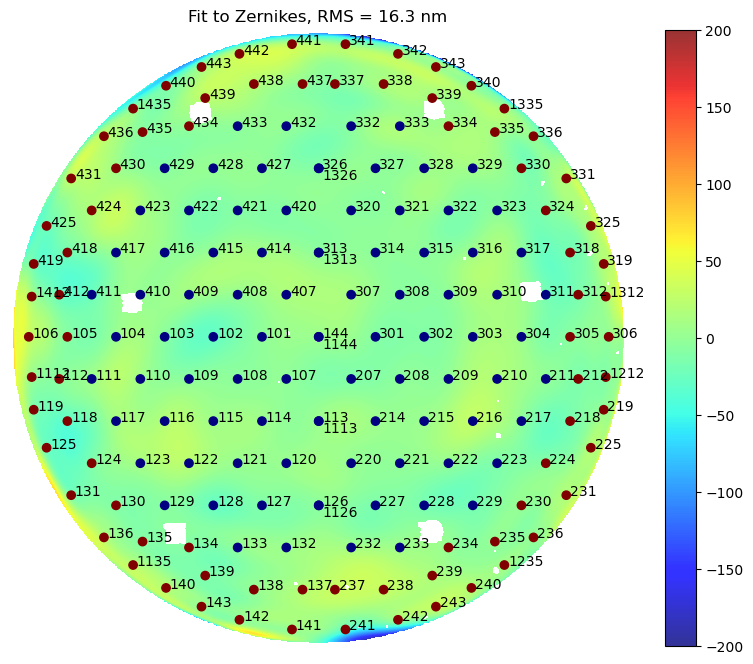

In [18]:
print(np.std(m1s[~np.isnan(m1s)]), np.sqrt(np.nanmean(m1s**2)))
#note: using a smoothing kernel will eat into the edge of the map, same for those holes filled with nans.

maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
nnodesNew = np.sum(maskNew)
zercoeff = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]
    
smoothed_image = np.zeros_like(m1s)
for izer in range(nzer):
    smoothed_image[maskNew] += zercoeff[izer]*zerU[maskNew.flatten(),izer]
smoothed_image[smoothed_image == 0] = np.nan

fig, ax = plt.subplots(1,1,figsize=(10,8))
#plt.imshow(np.flipud(LS[80:-85,50:-110, :]), extent=[0,Sxn, Syn,0])
plt.imshow(smoothed_image, origin='lower', vmin=-200, vmax=200, alpha=0.8)
plt.title('Fit to Zernikes, RMS = %.1f nm'%(np.sqrt(np.nanmean(smoothed_image**2))))
plt.axis('off')
plt.colorbar()
saxpix = np.zeros_like(sax)
saypix = np.zeros_like(say)
sa8 = []
for i in range(len(sax)):
    saxpix[i] = saID2pixx(saID[i], centerRow, centerCol, pixelSize)
    saypix[i] = saID2pixy(saID[i], centerRow, centerCol, pixelSize)
    if (np.any(abs(sax[i]+say[i]-sax[:i]-say[:i])<1e-4)):
        plt.text(saxpix[i]+.05/pixelSize, saypix[i]-0.15/pixelSize, str(saID[i]))
    else:
        plt.text(saxpix[i]+.05/pixelSize, saypix[i], str(saID[i]))
    if np.mod(saID[i],100) == 35:
        sa8.append(saID[i])
        if dfSA['LSActType'][i]==30:
            print('on puck ', saID[i])
        if dfSA['LSActType'][i]==31:
            print('on bar', saID[i])
plt.scatter(saxpix, saypix, c=saz)

on bar 135
on bar 235
on bar 335
on bar 435
on puck  1135
on puck  1235
on puck  1335
on puck  1435


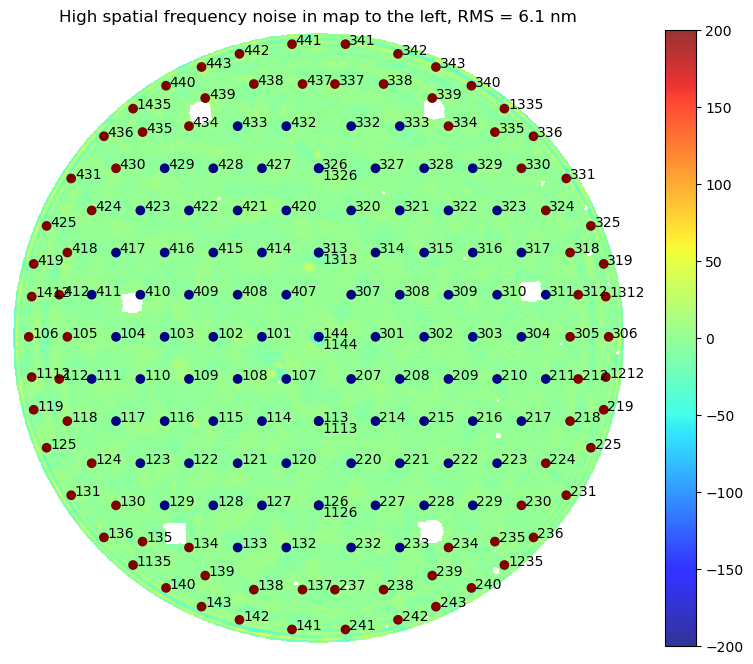

In [19]:
residual = m1s-smoothed_image
fig, ax = plt.subplots(1,1,figsize=(10,8))
#plt.imshow(np.flipud(LS[80:-85,50:-110, :]), extent=[0,Sxn, Syn,0])
plt.imshow(residual, origin='lower', vmin=-200, vmax=200, alpha=0.8)
plt.title('High spatial frequency noise in map to the left, RMS = %.1f nm'%(np.sqrt(np.nanmean(residual**2))))
plt.axis('off')
plt.colorbar()
saxpix = np.zeros_like(sax)
saypix = np.zeros_like(say)
sa8 = []
for i in range(len(sax)):
    saxpix[i] = saID2pixx(saID[i], centerRow, centerCol, pixelSize)
    saypix[i] = saID2pixy(saID[i], centerRow, centerCol, pixelSize)
    if (np.any(abs(sax[i]+say[i]-sax[:i]-say[:i])<1e-4)):
        plt.text(saxpix[i]+.05/pixelSize, saypix[i]-0.15/pixelSize, str(saID[i]))
    else:
        plt.text(saxpix[i]+.05/pixelSize, saypix[i], str(saID[i]))
    if np.mod(saID[i],100) == 35:
        sa8.append(saID[i])
        if dfSA['LSActType'][i]==30:
            print('on puck ', saID[i])
        if dfSA['LSActType'][i]==31:
            print('on bar', saID[i])
plt.scatter(saxpix, saypix, c=saz)

In [43]:
print(np.sqrt(18.5**2+15.6**2), np.sqrt(35**2-16**2))

24.19938015735114 31.12876483254676


In [50]:
np.sqrt(6**2+16**2)

17.08800749063506

In [7]:
#save a map for Trupti to examine
from scipy.io import savemat
[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
data = {'m1s': m1s, 'x1': x1, 'y1':y1}
savemat('m1surf_M1B_250221.mat', data)

In [12]:
# fit surface map from each iteration to Zernike
#nzer = int(#(6*7)/2+1)
nzer = int((8*9)/2+1) 
zercoeff = np.zeros((niter, nzer))

[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()
for i in range(niter):
    m1s = np.squeeze(m1s_array[:,:,i])
    maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
    nnodesNew = np.sum(maskNew)
    zercoeff[i,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]

In [13]:
## define continuous timestamps
start_time = unix_ts(ts_array[0])-60*6 - 60 #1 minute before starting the first measurement
end_time = unix_ts(ts_array[-1])+60*5 #5 minute after the last measurement
#get continuous mirror positions
mirror_pos_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', 
                                   duration_in_s=end_time-start_time, samples=ntsamples)
#get continuous bending forces
bend_force_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', 
                           duration_in_s=end_time-start_time, samples=ntsamples)
bend_force_z_ntsamples = bend_force_ntsamples[:,:,2]
# convert continuous forces to continuous BM coeffs.
bm_coeff_ntsamples = np.zeros((ntsamples, nBMs))
for i in range(ntsamples):
    bm_coeff_ntsamples[i,:] = VMat[:, :nBMs].transpose() @ gmt170Fvec2gmt165Fvec(bend_force_z_ntsamples[i,:]) \
        / np.sum(VMat[:,:nBMs]**2, axis=0)

m1_s1_support_ctrl/s/mirror_position/value
2025-02-21 11:51:33  duration =  12615  s
(100, 6)
m1_s1_support_ctrl/s/sa_bending_force/value
2025-02-21 11:51:33  duration =  12615  s
(100, 170, 3)


In [14]:
# get TC data
tc, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/tc_temperature/value', 
                   duration_in_s=end_time-start_time, samples=ntsamples)
tambient, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/ambient_temperature/value', 
                         duration_in_s=end_time-start_time, samples=ntsamples)

m1_s1_thermal_ctrl/i/tc_temperature/value
2025-02-21 11:51:33  duration =  12615  s
(100, 192)
m1_s1_thermal_ctrl/i/ambient_temperature/value
2025-02-21 11:51:33  duration =  12615  s
(100,)


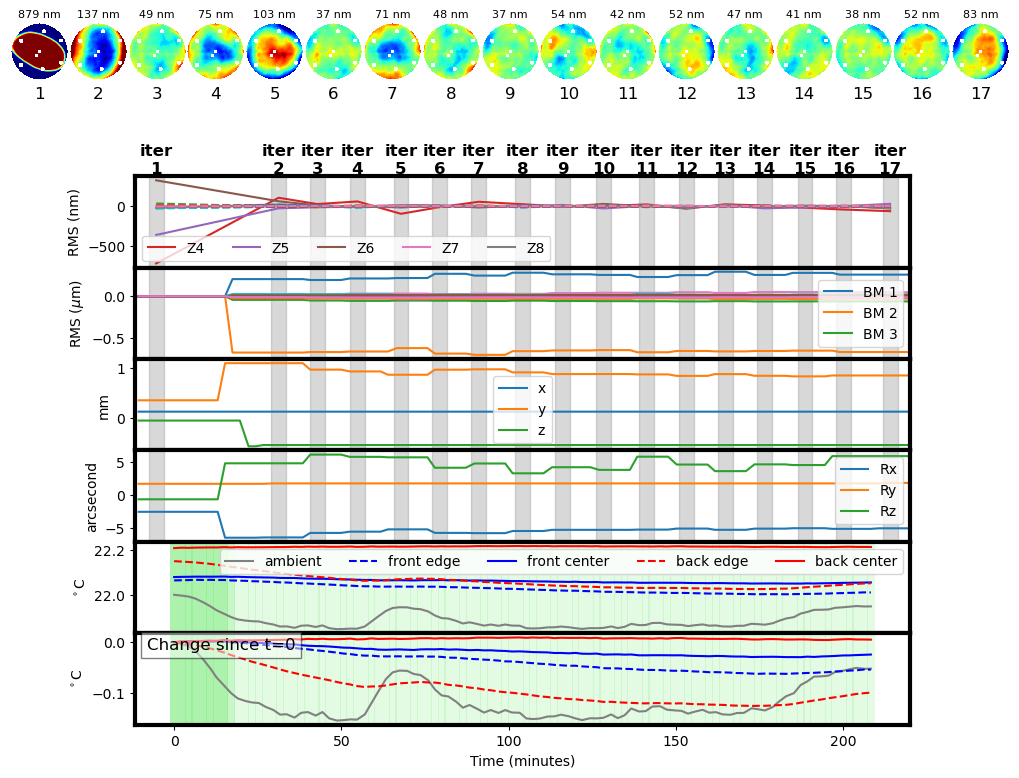

In [15]:
plotOptimization1(m1s_array, m1rms_array, ts_array, zercoeff, ntsamples, bm_coeff_ntsamples, tt, 
                  mirror_pos_ntsamples, tambient, 
                  tc, band_width)

In [24]:
np.sqrt(19**2+16**2)

24.839484696748443

In [26]:
np.sqrt(19**2+(30/np.sqrt(2))**2)

28.478061731796284

In [47]:
np.sqrt(27**2+(30/np.sqrt(2))**2)

34.336569426778794

In [48]:
np.sqrt(27**2+(30/np.sqrt(2))**2+20**2)

39.736632972611055

In [50]:
nmeasure = 2
print(np.sqrt(27**2+(30/np.sqrt(nmeasure))**2+ ( 20/12* (12+(nmeasure-2)*2) )**2))
nmeasure = 4
print(np.sqrt(27**2+(30/np.sqrt(nmeasure))**2+ ( 20/12* (12+(nmeasure-2)*2) )**2))

39.736632972611055
40.805773012052


### For the report

In [33]:
np.sqrt(19**2+(30/np.sqrt(2))**2)

28.478061731796284

In [34]:
np.sqrt(19**2+16**2+(30/np.sqrt(2))**2)

32.66496594212215

In [29]:
np.sqrt(19**2-16**2)

10.246950765959598

In [35]:
np.sqrt(19**2+16**2+10**2+(30/np.sqrt(2))**2)

34.161381705077446

In [38]:
np.sqrt(19**2+16**2+10**2)

26.77685567799177

In [36]:
np.sqrt(16**2+10**2)

18.867962264113206

In [39]:
band_width

4

In [40]:
np.sqrt(19**2+16**2+10**2+(30/np.sqrt(2))**2+20**2)

39.585350825778974

In [42]:
np.sqrt(19**2+16**2+10**2+(30/np.sqrt(2))**2+40**2)

52.602281319349636